# Evaluation of Generated Texts

In this notebook, we evaluate the generated plain language summaries using BERTScore and other metrics. We compare the generated summaries against ground truth summaries to measure the quality and accuracy of the generated texts.

In [ ]:
import requests
import os
import pandas as pd
import numpy as npx
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from evaluate import load

In [ ]:
bertscore = load("bertscore")
bleu = load("bleu")
rouge = load("rouge")

In [ ]:
folder_path_ground_truth = "/content/drive/MyDrive/output_ppls/ground_truth"
folder_path_gpt_35 = "/content/drive/MyDrive/output_ppls/gpt_35"
folder_path_gpt_4 = "/content/drive/MyDrive/output_ppls/gpt_4"

def read_texts_from_folder(folder_path):
    files = os.listdir(folder_path)
    texts = []
    for file in files:
        try:
            with open(os.path.join(folder_path, file), 'r', encoding="utf-8") as f:
                texts.append(f.read())
        except UnicodeDecodeError:
            try:
                with open(os.path.join(folder_path, file), 'r', encoding="cp1252") as f:
                    texts.append(f.read())
            except UnicodeDecodeError as e:
                print(f"Error decoding {file}: {e}")
                # O manejar el error de alguna otra manera
    return texts

# Ahora, usa la función para leer los textos
texts_ground_truth = read_texts_from_folder(folder_path_ground_truth)
texts_gpt_35 = read_texts_from_folder(folder_path_gpt_35)
texts_gpt_4 = read_texts_from_folder(folder_path_gpt_4)

In [ ]:
len(texts_gpt_4)

9

In [ ]:
len(texts_gpt_35)

9

In [ ]:
len(texts_ground_truth)

9

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
import gc
del results
gc.collect()

408

In [ ]:
texts_ground_truth[0]

'Long Term Safety of Anifrolumab in Adult Subjects With Active Systemic Lupus Erythematosus. Researchers are looking for a better way to treat lupus in adults. Researchers do clinical trials to find out how treatments work and how safe they are. Lupus is a long-term disease of the immune system, which is the body’s natural defense system against things like viruses and bacteria. In people with lupus, the immune system mistakenly attacks healthy tissues of the body. This leads to symptoms such as skin rashes, tiredness, and inflammation, which causes swollen and painful joints and muscles. Lupus can also lead to more serious problems such as heart, lung, or brain damage. Researchers think that specific proteins in the body called type 1 interferons are involved in the inflammation caused by lupus. The trial treatment, anifrolumab, was designed to stop type 1 interferons from activating the immune system. Researchers think that this could reduce inflammation in people with lupus. Anifrol

In [ ]:
results = {}

In [ ]:
results = {}
r_gpt4 = f"allenai/longformer-large-4096-finetuned-triviaqa_gpt4"
r_gpt35 = f"allenai/longformer-large-4096-finetuned-triviaqa_gpt35"
results[r_gpt35] = bertscore.compute(
    predictions=texts_gpt_35,
    references=texts_ground_truth,
    model_type="allenai/longformer-large-4096-finetuned-triviaqa"
)
results[r_gpt4] = bertscore.compute(
    predictions=texts_gpt_4,
    references=texts_ground_truth,
    model_type="allenai/longformer-large-4096-finetuned-triviaqa"
    )

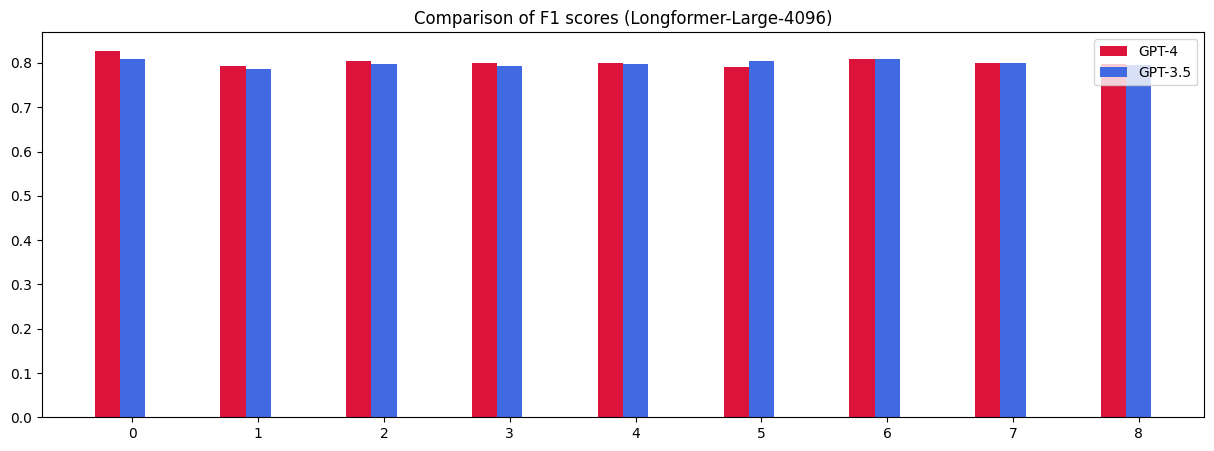

In [ ]:
# Plot f1 score
f1_scores = results[r_gpt4]["f1"]
f1_scores_gpt_35 = results[r_gpt35]["f1"]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(f1_scores))

ax.bar(x, f1_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], f1_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(f1_scores))])
ax.set_title("Comparison of F1 scores (Longformer-Large-4096)")
ax.legend()

plt.show()

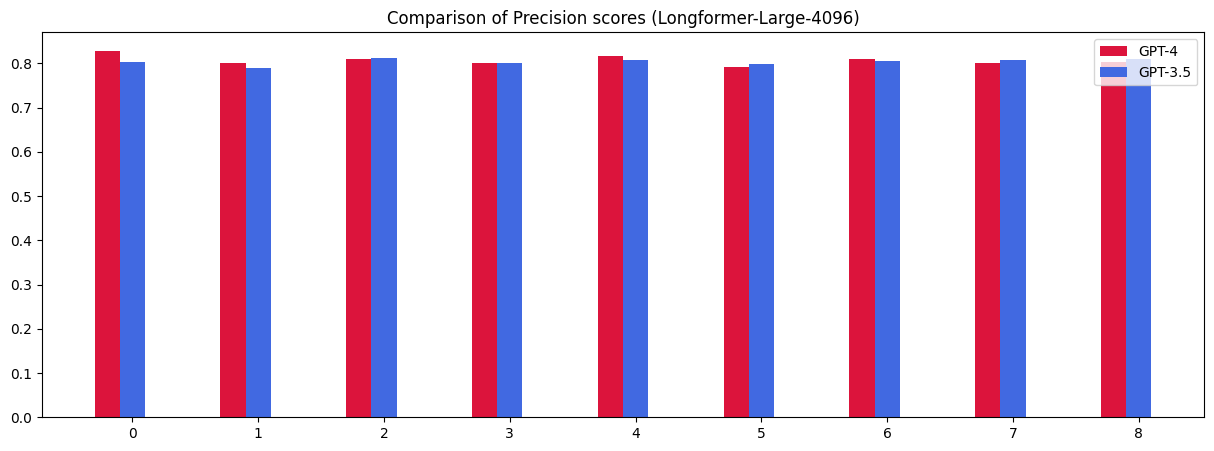

In [ ]:
# Plot f1 score
precision_scores = results[r_gpt4]["precision"]
precision_scores_gpt_35 = results[r_gpt35]["precision"]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(precision_scores))

ax.bar(x, precision_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], precision_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(precision_scores))])
ax.set_title("Comparison of Precision scores (Longformer-Large-4096)")
ax.legend()

plt.show()

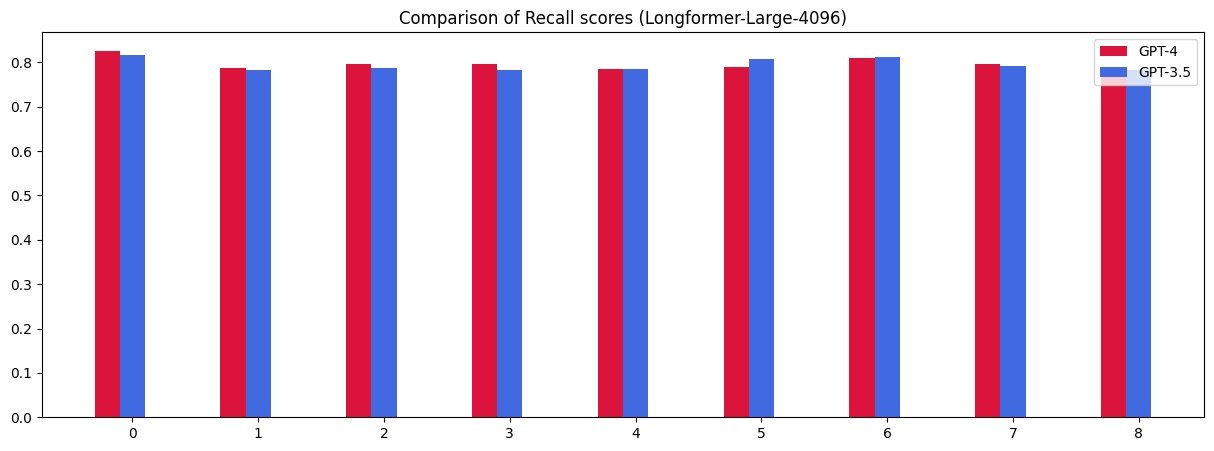

In [ ]:
# Plot f1 score
recall_scores = results[r_gpt4]["recall"]
recall_scores_gpt_35 = results[r_gpt35]["recall"]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(recall_scores))

ax.bar(x, recall_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], recall_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(recall_scores))])
ax.set_title("Comparison of Recall scores (Longformer-Large-4096)")
ax.legend()

plt.show()

In [ ]:
import json
with open('results_ppls_gpt_4.json', 'w') as f:
    json.dump(results[r_gpt4], f)

with open('results_ppls_gpt_35.json', 'w') as f:
    json.dump(results[r_gpt35], f)

In [ ]:
# Initialize dictionaries to store results for GPT-4 and GPT-35
results_gpt_4 = {'precision': [], 'recall': [], 'f1': []}
results_gpt_35 = {'precision': [], 'recall': [], 'f1': []}

# Iterate over the data and separate the results into the respective dictionaries
for key, value in results.items():
    print(key)
    if 'gpt4' in key:
        results_gpt_4['precision'] = results_gpt_4['precision'] + value['precision']
        results_gpt_4['recall'] = results_gpt_4['recall'] + value['recall']
        results_gpt_4['f1'] = results_gpt_4['f1'] + value['f1']
    elif 'gpt35' in key:
        results_gpt_35['precision'] = results_gpt_35['precision'] + value['precision']
        results_gpt_35['recall'] = results_gpt_35['recall'] + value['recall']
        results_gpt_35['f1'] = results_gpt_35['f1'] + value['f1']

results_gpt_4, results_gpt_35

facebook/bart-large-mnli_gpt4_1
facebook/bart-large-mnli_gpt35_1
facebook/bart-large-mnli_gpt4_2
facebook/bart-large-mnli_gpt35_2
facebook/bart-large-mnli_gpt4_3
facebook/bart-large-mnli_gpt35_3
facebook/bart-large-mnli_gpt4_4
facebook/bart-large-mnli_gpt35_4
facebook/bart-large-mnli_gpt4_5
facebook/bart-large-mnli_gpt35_5
facebook/bart-large-mnli_gpt4_6
facebook/bart-large-mnli_gpt35_6
facebook/bart-large-mnli_gpt4_7
facebook/bart-large-mnli_gpt35_7
facebook/bart-large-mnli_gpt4_8
facebook/bart-large-mnli_gpt35_8
facebook/bart-large-mnli_gpt4_9
facebook/bart-large-mnli_gpt35_9
facebook/bart-large-mnli_gpt4_10
facebook/bart-large-mnli_gpt35_10
facebook/bart-large-mnli_gpt4_11
facebook/bart-large-mnli_gpt35_11
facebook/bart-large-mnli_gpt4_12
facebook/bart-large-mnli_gpt35_12
facebook/bart-large-mnli_gpt4_13
facebook/bart-large-mnli_gpt35_13
facebook/bart-large-mnli_gpt4_14
facebook/bart-large-mnli_gpt35_14
facebook/bart-large-mnli_gpt4_15
facebook/bart-large-mnli_gpt35_15
facebook/bart

({'precision': [0.5544986724853516,
   0.5842946171760559,
   0.5771188735961914,
   0.5473431348800659,
   0.5778084993362427,
   0.5618857145309448,
   0.5628688335418701,
   0.612517237663269,
   0.58132004737854,
   0.5586987733840942,
   0.5668591856956482,
   0.5536668300628662,
   0.5981842279434204,
   0.553693413734436,
   0.5846501588821411,
   0.5171374082565308,
   0.587201714515686,
   0.5435212850570679,
   0.5487349033355713,
   0.5565096139907837,
   0.5550116300582886,
   0.5743672847747803,
   0.5507493615150452,
   0.5440987944602966,
   0.5296550989151001,
   0.5198606848716736,
   0.5263918042182922,
   0.5323164463043213,
   0.521886944770813,
   0.5438578128814697,
   0.5663763880729675,
   0.5534008741378784,
   0.5860253572463989,
   0.5006436109542847,
   0.5889208316802979,
   0.5628736019134521,
   0.6678363084793091,
   0.5193211436271667,
   0.5895353555679321,
   0.5704889297485352,
   0.5751364231109619,
   0.5962153673171997,
   0.5640169382095337,
   0

In [ ]:
results_bleu = {}
r_gpt4 = f"gpt4"
r_gpt35 = f"gpt35"
results_bleu[r_gpt4] = []
results_bleu[r_gpt35] = []
n = 0
for i in range(len(texts_ground_truth)):
  results_bleu[r_gpt35].append(bleu.compute(
    predictions=[texts_gpt_35[i]],
    references=[texts_ground_truth[i]])["precisions"][n])
  results_bleu[r_gpt4].append(bleu.compute(
      predictions=[texts_gpt_4[i]],
      references=[texts_ground_truth[i]])["precisions"][n])

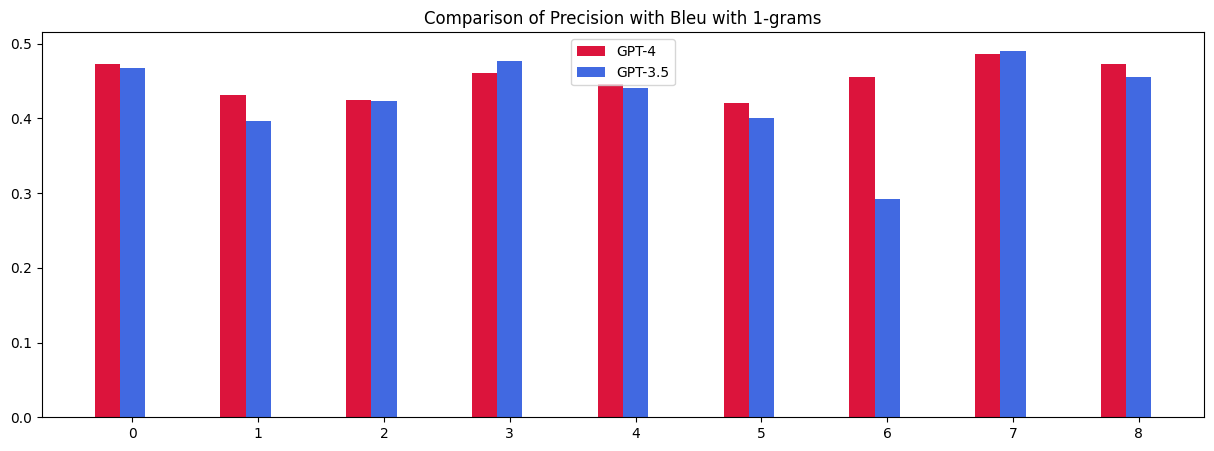

In [ ]:
# Plot f1 score
bleu_scores = results_bleu[r_gpt4]
bleu_scores_gpt_35 = results_bleu[r_gpt35]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(bleu_scores))

ax.bar(x, bleu_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], bleu_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(bleu_scores))])
ax.set_title(f"Comparison of Precision with Bleu with {n+1}-grams")
ax.legend()

plt.show()

In [ ]:
results_rouge = {}
r_gpt4 = f"gpt4"
r_gpt35 = f"gpt35"
results_rouge[r_gpt4] = []
results_rouge[r_gpt35] = []
n = 1
for i in range(len(texts_ground_truth)):
  results_rouge[r_gpt35].append(rouge.compute(
    predictions=[texts_gpt_35[i]],
    references=[texts_ground_truth[i]])["rougeL"])
  results_rouge[r_gpt4].append(rouge.compute(
      predictions=[texts_gpt_4[i]],
      references=[texts_ground_truth[i]])["rougeL"])

In [ ]:
results_rouge

{'gpt4': [0.21785714285714286,
  0.18674698795180725,
  0.18903150525087517,
  0.3473774720550301,
  0.1898989898989899,
  0.21710526315789475,
  0.2988721804511278,
  0.323062558356676,
  0.20722433460076045],
 'gpt35': [0.2323049001814882,
  0.19002822201317027,
  0.17206982543640897,
  0.32805219012115566,
  0.19762122598353155,
  0.2321618743343983,
  0.3086269744835966,
  0.30474268415741673,
  0.18965517241379312]}

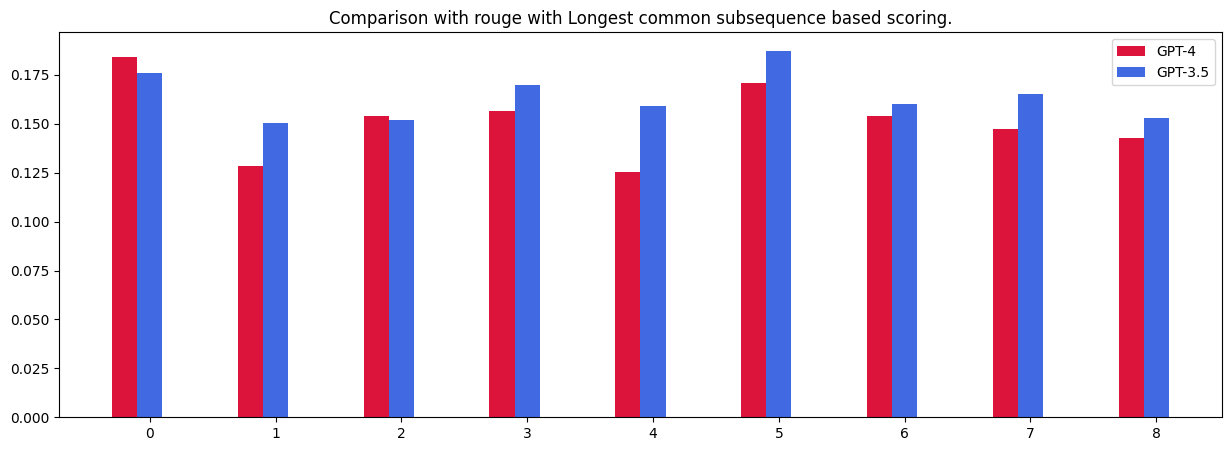

In [ ]:
# Plot f1 score
rouge_scores = results_rouge[r_gpt4]
rouge_scores_gpt_35 = results_rouge[r_gpt35]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(rouge_scores))

ax.bar(x, rouge_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], rouge_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(rouge_scores))])
ax.set_title(f"Comparison with rouge with Longest common subsequence based scoring.")
ax.legend()

plt.show()

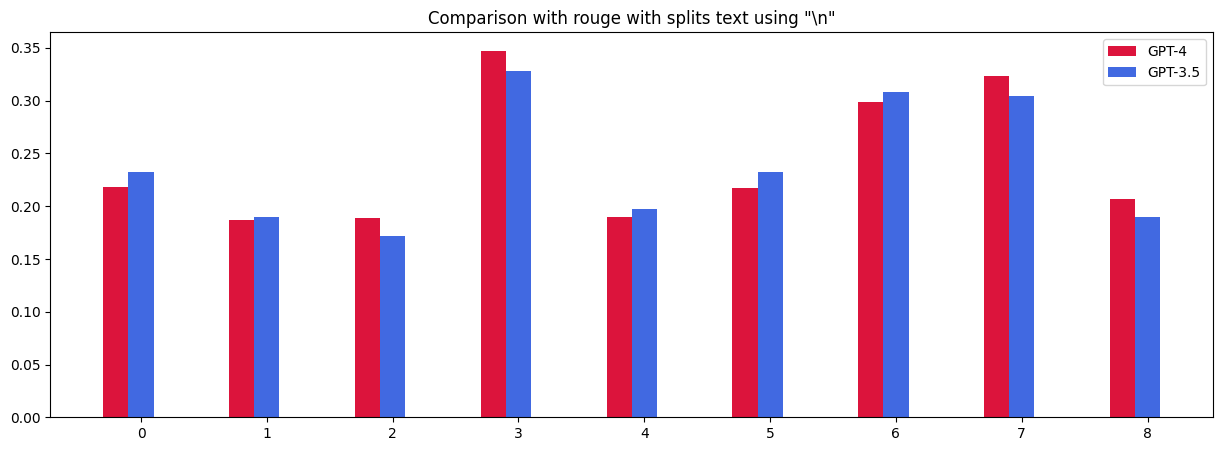

In [ ]:
# Plot f1 score
rouge_scores = results_rouge[r_gpt4]
rouge_scores_gpt_35 = results_rouge[r_gpt35]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(rouge_scores))

ax.bar(x, rouge_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], rouge_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(rouge_scores))])
ax.set_title(f"Comparison with rouge with splits text using \"\\n\"")
ax.legend()

plt.show()

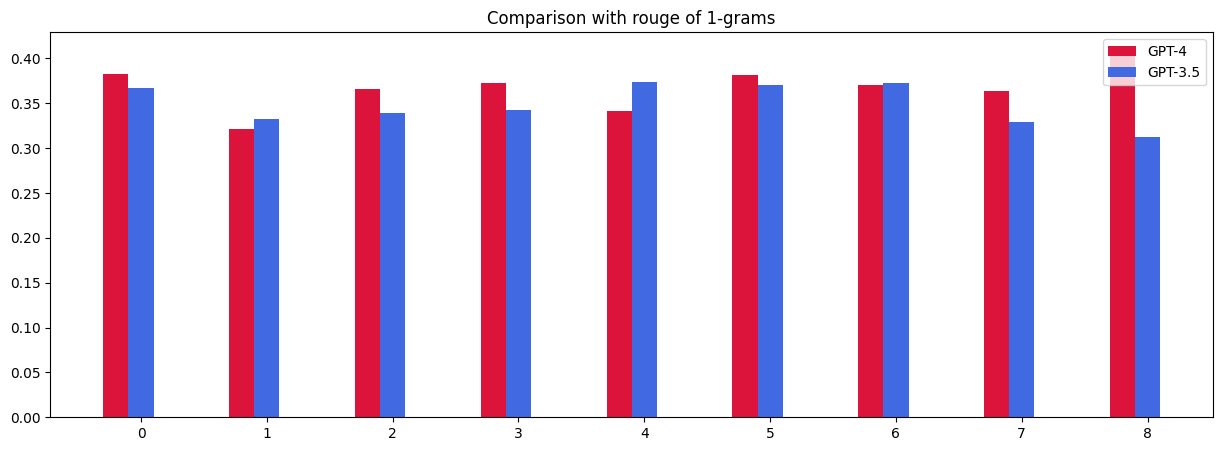

In [ ]:
# Plot f1 score
rouge_scores = results_rouge[r_gpt4]
rouge_scores_gpt_35 = results_rouge[r_gpt35]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(rouge_scores))

ax.bar(x, rouge_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], rouge_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(rouge_scores))])
ax.set_title(f"Comparison with rouge of {n+1}-grams")
ax.legend()

plt.show()

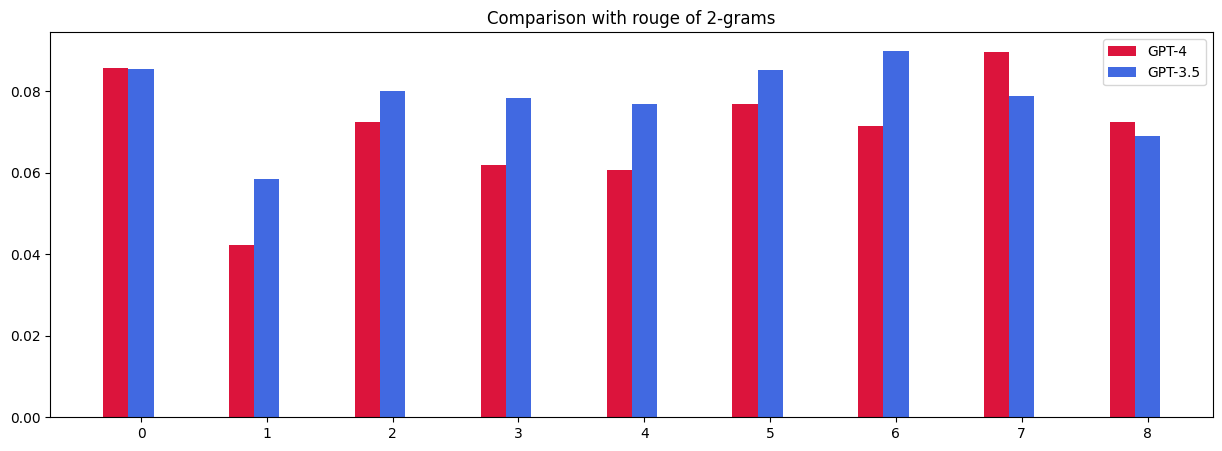

In [ ]:
# Plot f1 score
rouge_scores = results_rouge[r_gpt4]
rouge_scores_gpt_35 = results_rouge[r_gpt35]

fig, ax = plt.subplots(figsize=(15, 5))

width = 0.20
x = range(len(rouge_scores))

ax.bar(x, rouge_scores, width, label='GPT-4', color='crimson')
ax.bar([i + width for i in x], rouge_scores_gpt_35, width, label='GPT-3.5', color='royalblue')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([i for i in range(len(rouge_scores))])
ax.set_title(f"Comparison with rouge of {n+1}-grams")
ax.legend()

plt.show()

In [ ]:
from scipy.stats import ttest_rel
# Perform a paired t-test on the 'f1' scores of GPT-4 and GPT-35
t_statistic, p_value = ttest_rel(results[r_gpt4]['precision'], results[r_gpt35]['precision'])
t_statistic, p_value

(0.9167783778237993, 0.38606155269211473)

In [ ]:
import json
with open('results_fb_gpt_4.json', 'w') as f:
    json.dump(results_gpt_4, f)

with open('results_fb_gpt_35.json', 'w') as f:
    json.dump(results_gpt_35, f)

In [ ]:
results.keys()

dict_keys(['results_longformer_cochrane_gpt4_1', 'results_longformer_cochrane_gpt35_1', 'results_longformer_cochrane_gpt4_2', 'results_longformer_cochrane_gpt35_2', 'results_longformer_cochrane_gpt4_3', 'results_longformer_cochrane_gpt35_3', 'results_longformer_cochrane_gpt4_4', 'results_longformer_cochrane_gpt35_4', 'results_longformer_cochrane_gpt4_5', 'results_longformer_cochrane_gpt35_5', 'results_longformer_cochrane_gpt4_6', 'results_longformer_cochrane_gpt35_6', 'results_longformer_cochrane_gpt4_7', 'results_longformer_cochrane_gpt35_7', 'results_longformer_cochrane_gpt4_8', 'results_longformer_cochrane_gpt35_8', 'results_longformer_cochrane_gpt4_9', 'results_longformer_cochrane_gpt35_9', 'results_longformer_cochrane_gpt4_10', 'results_longformer_cochrane_gpt35_10', 'results_longformer_cochrane_gpt4_11', 'results_longformer_cochrane_gpt35_11'])

In [ ]:
results_longformer_cochrane_gpt4_1 = bertscore.compute(predictions=texts_gpt_4[220:20], references=texts_ground_truth[220:20], model_type="allenai/longformer-large-4096-finetuned-triviaqa")
results_longformer_cochrane_gpt35_1 = bertscore.compute(predictions=texts_gpt_35[:20], references=texts_ground_truth[:20], model_type="allenai/longformer-large-4096-finetuned-triviaqa")
results_longformer_cochrane_gpt4_2 = bertscore.compute(predictions=texts_gpt_4[20:40], references=texts_ground_truth[20:40], model_type="allenai/longformer-large-4096-finetuned-triviaqa")
results_longformer_cochrane_gpt35_2 = bertscore.compute(predictions=texts_gpt_35[20:40], references=texts_ground_truth[20:40], model_type="allenai/longformer-large-4096-finetuned-triviaqa")

config.json:   0%|          | 0.00/866 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

In [ ]:
results_longformer_cochrane_gpt4_2 = bertscore.compute(predictions=texts_gpt_4[20:40], references=texts_ground_truth[20:40], model_type="allenai/longformer-large-4096-finetuned-triviaqa")
results_longformer_cochrane_gpt35_2 = bertscore.compute(predictions=texts_gpt_35[20:40], references=texts_ground_truth[20:40], model_type="allenai/longformer-large-4096-finetuned-triviaqa")

In [ ]:
results_longformer_cochrane_gpt4_3 = bertscore.compute(predictions=texts_gpt_4[40:60], references=texts_ground_truth[40:60], model_type="allenai/longformer-large-4096-finetuned-triviaqa")
results_longformer_cochrane_gpt35_3 = bertscore.compute(predictions=texts_gpt_35[40:60], references=texts_ground_truth[40:60], model_type="allenai/longformer-large-4096-finetuned-triviaqa")

In [ ]:
results_longformer_cochrane_gpt4_4 = bertscore.compute(predictions=texts_gpt_4[60:80], references=texts_ground_truth[60:80], model_type="allenai/longformer-large-4096-finetuned-triviaqa")
results_longformer_cochrane_gpt35_4 = bertscore.compute(predictions=texts_gpt_35[60:80], references=texts_ground_truth[60:80], model_type="allenai/longformer-large-4096-finetuned-triviaqa")

In [ ]:
results_longformer_cochrane_gpt4_5 = bertscore.compute(predictions=texts_gpt_4[80:100], references=texts_ground_truth[80:100], model_type="allenai/longformer-large-4096-finetuned-triviaqa")
results_longformer_cochrane_gpt35_5 = bertscore.compute(predictions=texts_gpt_35[80:100], references=texts_ground_truth[80:100], model_type="allenai/longformer-large-4096-finetuned-triviaqa")

In [ ]:
results_longformer_cochrane_gpt4_6 = bertscore.compute(predictions=texts_gpt_4[100:], references=texts_ground_truth[100:], model_type="allenai/longformer-large-4096-finetuned-triviaqa")
results_longformer_cochrane_gpt35_6 = bertscore.compute(predictions=texts_gpt_35[100:], references=texts_ground_truth[100:], model_type="allenai/longformer-large-4096-finetuned-triviaqa")

In [ ]:
precision_1 = results_longformer_cochrane_gpt4_1['precision']
recall_1 = results_longformer_cochrane_gpt4_1['recall']
f1_1 = results_longformer_cochrane_gpt4_1['f1']

In [ ]:
precision_2 = results_longformer_cochrane_gpt4_2['precision']
recall_2 = results_longformer_cochrane_gpt4_2['recall']
f1_2 = results_longformer_cochrane_gpt4_2['f1']

In [ ]:
precision_3 = results_longformer_cochrane_gpt4_3['precision']
recall_3 = results_longformer_cochrane_gpt4_3['recall']
f1_3 = results_longformer_cochrane_gpt4_3['f1']

In [ ]:
precision_4 = results_longformer_cochrane_gpt4_4['precision']
recall_4 = results_longformer_cochrane_gpt4_4['recall']
f1_4 = results_longformer_cochrane_gpt4_4['f1']

In [ ]:
precision_5 = results_longformer_cochrane_gpt4_5['precision']
recall_5 = results_longformer_cochrane_gpt4_5['recall']
f1_5 = results_longformer_cochrane_gpt4_5['f1']

In [ ]:
precision_6 = results_longformer_cochrane_gpt4_6['precision']
recall_6 = results_longformer_cochrane_gpt4_6['recall']
f1_6 = results_longformer_cochrane_gpt4_6['f1']

In [ ]:
f1_gpt4 = f1_1 + f1_2 + f1_3 + f1_4 + f1_5 + f1_6
precision_gpt4 = precision_1 + precision_2 + precision_3 + precision_4 + precision_5 + precision_6
recall_gpt4 = recall_1 + recall_2 + recall_3 + recall_4 + recall_5 + recall_6

results_longformer_cochrane_gpt4 = {}
results_longformer_cochrane_gpt4['precision'] = precision_gpt4
results_longformer_cochrane_gpt4['recall'] = recall_gpt4
results_longformer_cochrane_gpt4['f1'] = f1_gpt4
results_longformer_cochrane_gpt4

{'precision': [0.7839252948760986,
  0.8025096654891968,
  0.7971634864807129,
  0.7842993140220642,
  0.7842890024185181,
  0.7882592082023621,
  0.7913055419921875,
  0.8127666711807251,
  0.7967017292976379,
  0.7917708158493042,
  0.7917456030845642,
  0.7774495482444763,
  0.8004282116889954,
  0.7732133865356445,
  0.7909913063049316,
  0.7758715152740479,
  0.8014787435531616,
  0.7864641547203064,
  0.7871936559677124,
  0.781390368938446,
  0.7931512594223022,
  0.7778012156486511,
  0.7839068174362183,
  0.783258855342865,
  0.7753442525863647,
  0.7608494758605957,
  0.7785906791687012,
  0.7775368690490723,
  0.779800295829773,
  0.7875965237617493,
  0.7878661155700684,
  0.7928590774536133,
  0.8036999702453613,
  0.7659061551094055,
  0.7978131175041199,
  0.7858160734176636,
  0.8523211479187012,
  0.7826504707336426,
  0.8016983270645142,
  0.7851050496101379,
  0.790803074836731,
  0.8057169318199158,
  0.7876313924789429,
  0.784937858581543,
  0.7816547155380249,
  

In [ ]:
# Para _1
precision_1 = results_longformer_cochrane_gpt35_1['precision']
recall_1 = results_longformer_cochrane_gpt35_1['recall']
f1_1 = results_longformer_cochrane_gpt35_1['f1']

# Para _2
precision_2 = results_longformer_cochrane_gpt35_2['precision']
recall_2 = results_longformer_cochrane_gpt35_2['recall']
f1_2 = results_longformer_cochrane_gpt35_2['f1']

# Para _3
precision_3 = results_longformer_cochrane_gpt35_3['precision']
recall_3 = results_longformer_cochrane_gpt35_3['recall']
f1_3 = results_longformer_cochrane_gpt35_3['f1']

# Para _4
precision_4 = results_longformer_cochrane_gpt35_4['precision']
recall_4 = results_longformer_cochrane_gpt35_4['recall']
f1_4 = results_longformer_cochrane_gpt35_4['f1']

# Para _5
precision_5 = results_longformer_cochrane_gpt35_5['precision']
recall_5 = results_longformer_cochrane_gpt35_5['recall']
f1_5 = results_longformer_cochrane_gpt35_5['f1']

# Para _6
precision_6 = results_longformer_cochrane_gpt35_6['precision']
recall_6 = results_longformer_cochrane_gpt35_6['recall']
f1_6 = results_longformer_cochrane_gpt35_6['f1']

f1_gpt35 = f1_1 + f1_2 + f1_3 + f1_4 + f1_5 + f1_6
precision_gpt35 = precision_1 + precision_2 + precision_3 + precision_4 + precision_5 + precision_6
recall_gpt35 = recall_1 + recall_2 + recall_3 + recall_4 + recall_5 + recall_6

results_longformer_cochrane_gpt35 = {}
results_longformer_cochrane_gpt35['precision'] = precision_gpt35
results_longformer_cochrane_gpt35['recall'] = recall_gpt35
results_longformer_cochrane_gpt35['f1'] = f1_gpt35
results_longformer_cochrane_gpt35

{'precision': [0.7850084900856018,
  0.7923835515975952,
  0.7787514328956604,
  0.7761006355285645,
  0.7823857069015503,
  0.7913665771484375,
  0.7908008694648743,
  0.8075686693191528,
  0.7955304384231567,
  0.7882530689239502,
  0.7954895496368408,
  0.7760149836540222,
  0.8101980686187744,
  0.7823495268821716,
  0.7991343140602112,
  0.7665894627571106,
  0.8091757893562317,
  0.7930967807769775,
  0.7949966192245483,
  0.780876874923706,
  0.7916431427001953,
  0.7881486415863037,
  0.7782250642776489,
  0.7892969846725464,
  0.7883710861206055,
  0.7637688517570496,
  0.7818271517753601,
  0.7898349761962891,
  0.7814518809318542,
  0.7781438231468201,
  0.7903143167495728,
  0.8109456300735474,
  0.7955396771430969,
  0.7908040881156921,
  0.7944298386573792,
  0.7790399789810181,
  0.8547947406768799,
  0.770750880241394,
  0.8115102052688599,
  0.7847480773925781,
  0.7986798286437988,
  0.7950671315193176,
  0.786137044429779,
  0.7766814231872559,
  0.7856732606887817,


In [ ]:
import json
with open('results_longformer_cochrane_gpt35.json', 'w') as f:
    json.dump(results_longformer_cochrane_gpt35, f)

In [ ]:
with open('results_longformer_cochrane_gpt4.json', 'w') as f:
    json.dump(results_longformer_cochrane_gpt4, f)

In [ ]:
!pip install numba

In [ ]:


from numba import cuda


In [ ]:
device = cuda.get_current_device()
device.reset()

In [ ]:
"""
Using the following clinical trial protocol text as input, generate a Protocol Plain Language Summary (PPLS) compliant
with GDPR and understandable by any patient, regardless of their health literacy. Ensure that the generated text
adheres to the following instructions which should be followed step-by-step:
a. Specific Structure: the generated PPLS should be presented in a logical order, using the following headings:
	1. Plain Protocol Title
	2. Rationale
	3. Objectives
	4. Trial Design
	5. Trial Population
	6. Interventions
b. Sections should be authored following these parameters:
  1. Plain Protocol Title: Simplified protocol title understandable to a layperson but including specific indication for which the study is meant.
  2. Rationale: Include: phrase ‘Researchers are looking for a better way to treat [condition]; background or study rationale providing a description of the condition: what it is, what it may cause and why it is a burden for the patients; the reason and main hypothesis for the study; and why the study is needed, and the study medication has the potential to treat the condition.
  3. Objectives: Answer ‘What are the goals of the study?’ Specify the main and secondary objectives of the trial and how will they be measured (eg. the main trial endpoint is the percent change in the number of events from baseline to a specified time or the total number of adverse reactions at a particular time after baseline).
  4. Trial Design: Answer ‘How is this study designed?’ Include the description of the design and the expected amount of time a person will be in the study.
  5. Trial Population: answer ‘Who will participate in this study?’ Include description of study and patient population (age, health condition, genre), the main or key inclusion and exclusion criteria.
  6. Interventions: answer ‘What treatments are being given during the study?’ Include a description of medication, vaccine or treatment(s) being studied, the route of administration, the duration of treatment, and any study-related diagnostic and monitoring procedures used. Include justification if placebo is used.
c. Consistency and Replicability: the generated PPLS should be consistent regardless of the order of sentences or the specific phrasing used in the input protocol text.
d. Compliance with Plain Language Guidelines: The generated PPLS must follow these plain language guidelines:
b. Have readability grade level of 6 or below.
c. Do not have jargon. All technical or medical words or terms should be defined or broken down into simple and logical explanations.
d. Active voice, not passive
e. Mostly one or two syllable words
f. Sentences of 15 words or less
g. Short paragraphs of 3-5 sentences
h. Simple numbers (eg, ratios, no percentages)
e. No Extra Content: The AI model should not invent information or add content that is not present in the input protocol. The PPLS should only present information from the original protocol in a simplified and understandable manner.
f. Aim for an approximate PPLS length of 700-900 words.
Clinical Trial Protocol Text:
[Input Trial Protocol]
"""